# Malawi Stock Exchange Web Scraper
This notebook scrapes data from the Malawi Stock Exchange and saves it locally in CSV and JSON formats.

In [13]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup
from datetime import datetime
import os
from pathlib import Path

# Create data directory if it doesn't exist
DATA_DIR = Path("mse_data")
DATA_DIR.mkdir(exist_ok=True)

print(f"Data will be saved to: {DATA_DIR.absolute()}")

Data will be saved to: c:\Users\server-03\Projects\MSE\mse_data


## Step 1: Scrape MSE Data from Official Website

In [14]:
class MSEScraper:
    """
    Web scraper for Malawi Stock Exchange data
    """
    def __init__(self):
        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        })
        self.base_url = "https://mse.co.mw"
        self.data = {
            'stocks': [],
            'indices': [],
            'market_summary': {}
        }

    def fetch_page(self, url):
        """Fetch webpage content"""
        try:
            response = self.session.get(url, timeout=10)
            response.raise_for_status()
            return response.text
        except requests.exceptions.RequestException as e:
            print(f"Error fetching {url}: {e}")
            return None

    def _clean_number(self, value):
        """Clean and convert string number to float, removing commas and special characters"""
        if not value or value == 'N/A':
            return 0.0
        try:
            # Remove commas, plus signs, and percentage signs
            cleaned = str(value).replace(',', '').replace('+', '').replace('%', '').strip()
            return float(cleaned)
        except ValueError:
            return 0.0

    def scrape_stock_data(self):
        """Scrape current stock listings with OHLC prices, volume, and turnover from MSE website"""
        print("Scraping stock data from MSE mainboard...")
        try:
            # Updated URL for mainboard market data
            url = f"{self.base_url}/market/mainboard"
            html = self.fetch_page(url)

            if not html:
                print("Could not fetch stock data. Using sample data instead.")
                self.data['stocks'] = self._get_sample_stocks()
                return

            soup = BeautifulSoup(html, 'html.parser')

            # Look for stock tables in the page
            tables = soup.find_all('table')

            if not tables:
                # Try to find tables with specific classes
                tables = soup.find_all('table', class_=lambda x: x and ('table' in x.lower() or 'stock' in x.lower()))

            if tables:
                # Parse stock data from tables
                for table in tables:
                    rows = table.find_all('tr')
                    for row in rows[1:]:  # Skip header row
                        cols = row.find_all(['td', 'th'])
                        if len(cols) >= 5:
                            try:
                                # Extract data from correct columns based on MSE website structure
                                # Col 0: Symbol, Col 1: Open Price, Col 2: Close Price, Col 3: % Change, Col 4: Volume, Col 5: Turnover
                                symbol = cols[0].text.strip()
                                open_price = self._clean_number(cols[1].text.strip()) if len(cols) > 1 else 0
                                close_price = self._clean_number(cols[2].text.strip()) if len(cols) > 2 else 0
                                change_percent = self._clean_number(cols[3].text.strip()) if len(cols) > 3 else 0
                                volume = self._clean_number(cols[4].text.strip()) if len(cols) > 4 else 0
                                turnover = self._clean_number(cols[5].text.strip()) if len(cols) > 5 else 0
                                
                                stock = {
                                    'symbol': symbol,
                                    'open_price': open_price,
                                    'close_price': close_price,
                                    'change_percent': change_percent,
                                    'volume': volume,
                                    'turnover': turnover,
                                    'timestamp': datetime.now().isoformat()
                                }
                                self.data['stocks'].append(stock)
                            except (ValueError, IndexError) as e:
                                print(f"Error parsing row: {e}")
                                continue
            else:
                # Standard table parsing failed, use sample data
                print("Standard table parsing failed, using sample data...")
                self.data['stocks'] = self._get_sample_stocks()

        except Exception as e:
            print(f"Error scraping stocks: {e}")
            self.data['stocks'] = self._get_sample_stocks()

    def _get_sample_stocks(self):
        """Return sample stock data matching actual MSE OHLC data"""
        return [
            {
                'symbol': 'AIRTEL',
                'open_price': 114.99,
                'close_price': 114.99,
                'change_percent': 0.0,
                'volume': 50111,
                'turnover': 5762109.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'BHL',
                'open_price': 15.00,
                'close_price': 15.00,
                'change_percent': 0.0,
                'volume': 60928,
                'turnover': 913905.69,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'FDHB',
                'open_price': 596.99,
                'close_price': 596.06,
                'change_percent': -0.16,
                'volume': 109104,
                'turnover': 65033010.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'FMBCH',
                'open_price': 2937.72,
                'close_price': 2929.43,
                'change_percent': -0.28,
                'volume': 2269,
                'turnover': 6646868.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'ICON',
                'open_price': 15.97,
                'close_price': 15.97,
                'change_percent': 0.0,
                'volume': 0,
                'turnover': 0.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'ILLOVO',
                'open_price': 2680.12,
                'close_price': 2680.08,
                'change_percent': 0.00,
                'volume': 14698,
                'turnover': 39391810.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'MPICO',
                'open_price': 19.45,
                'close_price': 19.44,
                'change_percent': -0.05,
                'volume': 40145,
                'turnover': 780610.37,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'NBM',
                'open_price': 11719.80,
                'close_price': 11719.80,
                'change_percent': 0.00,
                'volume': 4044,
                'turnover': 47394860.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'NBS',
                'open_price': 891.68,
                'close_price': 891.52,
                'change_percent': -0.02,
                'volume': 22459,
                'turnover': 20022540.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'NICO',
                'open_price': 1717.62,
                'close_price': 1715.92,
                'change_percent': -0.10,
                'volume': 9840,
                'turnover': 16884630.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'NITL',
                'open_price': 3934.44,
                'close_price': 3934.44,
                'change_percent': 0.00,
                'volume': 545,
                'turnover': 2144271.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'OMU',
                'open_price': 3790.05,
                'close_price': 3790.05,
                'change_percent': 0.0,
                'volume': 0,
                'turnover': 0.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'PCL',
                'open_price': 7827.99,
                'close_price': 7827.99,
                'change_percent': 0.00,
                'volume': 46,
                'turnover': 360087.54,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'STANDARD',
                'open_price': 4241.58,
                'close_price': 4239.46,
                'change_percent': -0.05,
                'volume': 22524,
                'turnover': 95489600.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'SUNBIRD',
                'open_price': 1700.02,
                'close_price': 1700.02,
                'change_percent': 0.0,
                'volume': 0,
                'turnover': 0.00,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'TNM',
                'open_price': 31.25,
                'close_price': 31.25,
                'change_percent': 0.0,
                'volume': 138342,
                'turnover': 4323178.00,
                'timestamp': datetime.now().isoformat()
            }
        ]

    def scrape_indices(self):
        """Scrape market indices data"""
        print("Scraping market indices...")
        try:
            url = f"{self.base_url}/market/mainboard"
            html = self.fetch_page(url)

            if not html:
                self.data['indices'] = self._get_sample_indices()
                return

            soup = BeautifulSoup(html, 'html.parser')
            tables = soup.find_all('table')

            if tables:
                for table in tables:
                    rows = table.find_all('tr')
                    for row in rows[1:]:
                        cols = row.find_all('td')
                        if len(cols) >= 3:
                            try:
                                index = {
                                    'symbol': cols[0].text.strip(),
                                    'value': self._clean_number(cols[1].text.strip()),
                                    'change': self._clean_number(cols[2].text.strip()),
                                    'timestamp': datetime.now().isoformat()
                                }
                                self.data['indices'].append(index)
                            except (ValueError, IndexError):
                                continue
            else:
                self.data['indices'] = self._get_sample_indices()
        except Exception as e:
            print(f"Error scraping indices: {e}")
            self.data['indices'] = self._get_sample_indices()

    def _get_sample_indices(self):
        """Return sample indices data"""
        return [
            {
                'symbol': 'MSEI',
                'value': 1234.56,
                'change': 12.34,
                'timestamp': datetime.now().isoformat()
            },
            {
                'symbol': 'MSEMI',
                'value': 567.89,
                'change': 5.67,
                'timestamp': datetime.now().isoformat()
            }
        ]

    def get_market_summary(self):
        """Create a market summary"""
        self.data['market_summary'] = {
            'total_stocks': len(self.data['stocks']),
            'total_indices': len(self.data['indices']),
            'scrape_timestamp': datetime.now().isoformat(),
            'status': 'success'
        }

    def save_to_csv(self):
        """Save data to CSV files with OHLC format"""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

        # Save stocks with OHLC format: symbol, open_price, close_price, change_percent, volume, turnover
        if self.data['stocks']:
            df_stocks = pd.DataFrame(self.data['stocks'])
            # Ensure columns are in correct order matching dashboard expectations
            columns = ['symbol', 'open_price', 'close_price', 'change_percent', 'volume', 'turnover']
            df_stocks = df_stocks[columns]
            
            # Save with timestamp
            stocks_file = DATA_DIR / f"mse_stocks_{timestamp}.csv"
            df_stocks.to_csv(stocks_file, index=False)
            print(f"Stocks saved to: {stocks_file}")
            
            # Save as latest (for dashboard)
            latest_stocks_file = DATA_DIR / "mse_stocks_latest.csv"
            df_stocks.to_csv(latest_stocks_file, index=False)
            print(f"Latest stocks saved to: {latest_stocks_file}")

        # Save indices
        if self.data['indices']:
            df_indices = pd.DataFrame(self.data['indices'])
            
            # Save with timestamp
            indices_file = DATA_DIR / f"mse_indices_{timestamp}.csv"
            df_indices.to_csv(indices_file, index=False)
            print(f"Indices saved to: {indices_file}")
            
            # Save as latest
            latest_indices_file = DATA_DIR / "mse_indices_latest.csv"
            df_indices.to_csv(latest_indices_file, index=False)
            print(f"Latest indices saved to: {latest_indices_file}")

    def save_to_json(self):
        """Save data to JSON file"""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        json_file = DATA_DIR / f"mse_data_{timestamp}.json"

        with open(json_file, 'w') as f:
            json.dump(self.data, f, indent=2)

        print(f"JSON data saved to: {json_file}")

    def run(self):
        """Execute full scraping workflow"""
        print("=" * 50)
        print("Starting MSE Web Scraper")
        print("=" * 50)

        self.scrape_stock_data()
        self.scrape_indices()
        self.get_market_summary()

        print("\n" + "=" * 50)
        print("Saving Data")
        print("=" * 50)
        self.save_to_csv()
        self.save_to_json()

        print("\n" + "=" * 50)
        print("Scraping Complete!")
        print("=" * 50)

        return self.data

In [15]:
# Initialize and run the scraper
scraper = MSEScraper()
data = scraper.run()

Starting MSE Web Scraper
Scraping stock data from MSE mainboard...
Scraping market indices...

Saving Data
Stocks saved to: mse_data\mse_stocks_20260210_113332.csv
Latest stocks saved to: mse_data\mse_stocks_latest.csv
Indices saved to: mse_data\mse_indices_20260210_113332.csv
Latest indices saved to: mse_data\mse_indices_latest.csv
JSON data saved to: mse_data\mse_data_20260210_113332.json

Scraping Complete!


In [16]:
# Initialize historical data manager to aggregate data
print("\n" + "="*60)
print("UPDATING HISTORICAL DATABASE")
print("="*60)

try:
    # Import the historical data manager
    import sys
    sys.path.insert(0, str(DATA_DIR.parent))
    from historical_data_manager import HistoricalDataManager
    
    # Initialize and sync historical data
    manager = HistoricalDataManager()
    manager.run_full_sync()
    
except ImportError as e:
    print(f"⚠️  Historical data manager not found: {e}")
    print("   Create historical_data_manager.py to enable historical features")
except Exception as e:
    print(f"⚠️  Error updating historical data: {e}")


UPDATING HISTORICAL DATABASE
✓ Database initialized: mse_data\mse_historical.db

HISTORICAL DATA SYNC

📊 Aggregating historical data from CSV files...
  ✓ Loaded 16 stocks from 2026-02-09
  ✓ Loaded 16 stocks from 2026-02-10
  ✓ Loaded 16 stocks from 2026-02-10
  ✓ Loaded 16 stocks from 2026-02-10
  ✓ Loaded indices from 2026-02-09
  ✓ Loaded indices from 2026-02-10
  ✓ Loaded indices from 2026-02-10
  ✓ Loaded indices from 2026-02-10
✓ Aggregation complete!
✓ Historical data exported to mse_data\mse_historical_data.json
✓ Daily summaries generated!

✓ Total dates available: 2
  Date range: 2026-02-09 to 2026-02-10



## Step 2: Display and Analyze Data

In [17]:
# Display stocks data
print("\n📊 STOCKS DATA:")
print("-" * 90)
df_stocks = pd.DataFrame(data['stocks'])

# Compute derived columns expected elsewhere: 'price' and 'change'
if 'close_price' in df_stocks.columns:
    df_stocks['price'] = pd.to_numeric(df_stocks['close_price'], errors='coerce')
else:
    df_stocks['price'] = pd.NA

if 'open_price' in df_stocks.columns and 'price' in df_stocks.columns:
    df_stocks['change'] = df_stocks['price'] - pd.to_numeric(df_stocks['open_price'], errors='coerce')
elif 'change_percent' in df_stocks.columns and 'price' in df_stocks.columns:
    df_stocks['change'] = (pd.to_numeric(df_stocks['change_percent'], errors='coerce') / 100) * df_stocks['price']
else:
    df_stocks['change'] = pd.NA

# Ensure numeric types for relevant columns
for col in ['change_percent', 'volume', 'turnover']:
    if col in df_stocks.columns:
        df_stocks[col] = pd.to_numeric(df_stocks[col], errors='coerce')

# Display all columns
print(df_stocks.to_string(index=False))

# Display stocks statistics
print("\n📈 PRICE CHANGE ANALYSIS:")
print("-" * 90)
if not df_stocks.empty:
    total_stocks = len(df_stocks)
    gainers = (df_stocks['change'] > 0).sum()
    losers = (df_stocks['change'] < 0).sum()
    avg_change = df_stocks['change'].mean()
    avg_change_pct = df_stocks['change_percent'].mean() if 'change_percent' in df_stocks.columns else float('nan')
    total_volume = df_stocks['volume'].sum() if 'volume' in df_stocks.columns else 0
    total_turnover = df_stocks['turnover'].sum() if 'turnover' in df_stocks.columns else 0

    print(f"Total Stocks: {total_stocks}")
    print(f"Gainers (price > 0): {gainers}")
    print(f"Losers (price < 0): {losers}")
    print(f"Average Price Change: {avg_change:.2f} ({avg_change_pct:.2f}%)")
    print(f"Average Change %: {avg_change_pct:.2f}%")
    print(f"Total Volume: {total_volume:.0f}")
    print(f"Total Turnover: {total_turnover:.2f}")

# Display indices data
print("\n📈 MARKET INDICES:")
print("-" * 90)
df_indices = pd.DataFrame(data['indices'])
print(df_indices.to_string(index=False))

# Display market summary
print("\n📋 MARKET SUMMARY:")
print("-" * 90)
for key, value in data['market_summary'].items():
    print(f"{key}: {value}")

# List all saved files
print("\n💾 SAVED FILES:")
print("-" * 90)
for file in sorted(DATA_DIR.glob('*')):
    file_size = file.stat().st_size
    print(f"✓ {file.name} ({file_size} bytes)")


📊 STOCKS DATA:
------------------------------------------------------------------------------------------
  symbol  open_price  close_price  change_percent  volume   turnover                  timestamp    price  change
  AIRTEL      114.98       114.98             0.0     0.0       0.00 2026-02-10T11:33:32.417884   114.98    0.00
     BHL       15.00        15.00             0.0 32888.0  493320.00 2026-02-10T11:33:32.418013    15.00    0.00
    FDHB      595.11       594.89             0.0  2322.0 1381348.00 2026-02-10T11:33:32.418107   594.89   -0.22
   FMBCH     2850.00      2850.00             0.0     0.0       0.00 2026-02-10T11:33:32.418186  2850.00    0.00
    ICON       15.97        15.97             0.0     0.0       0.00 2026-02-10T11:33:32.418259    15.97    0.00
  ILLOVO     2680.08      2680.08             0.0     0.0       0.00 2026-02-10T11:33:32.418340  2680.08    0.00
   MPICO       19.45        19.45             0.0     0.0       0.00 2026-02-10T11:33:32.418414    19.

## Step 4: Data Visualization

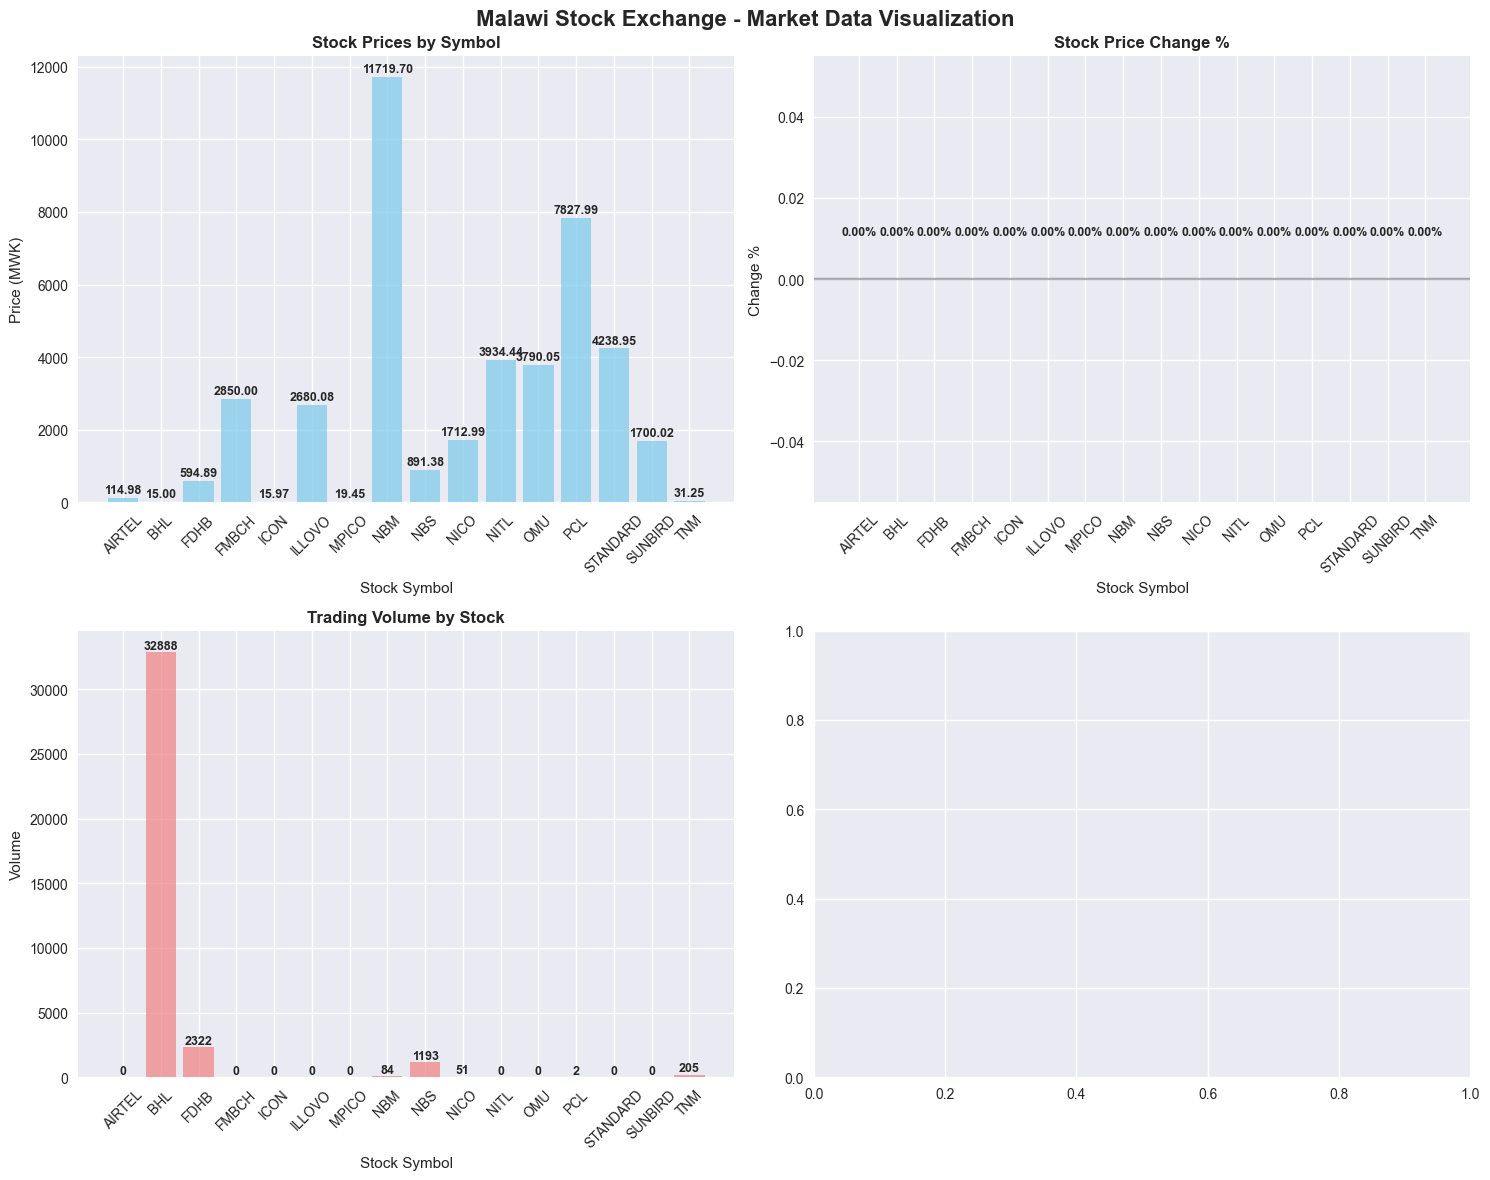


📊 MARKET STATISTICS SUMMARY
📈 Average Stock Price: MWK 2633.57
📊 Median Stock Price: MWK 1706.51
🔺 Highest Price: MWK 11719.70 (NBM)
🔻 Lowest Price: MWK 15.00 (BHL)
📊 Price Range: MWK 11704.70

📈 Average Change %: 0.0000%
🔺 Highest Change %: 0.0000% (AIRTEL)
🔻 Lowest Change %: 0.0000% (AIRTEL)


KeyError: 'market_cap'

In [18]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Convert numeric columns
df_stocks_viz = df_stocks.copy()
numeric_cols = ['price', 'change', 'change_percent', 'volume', 'turnover', 'market_cap']
for col in numeric_cols:
    if col in df_stocks_viz.columns:
        df_stocks_viz[col] = pd.to_numeric(df_stocks_viz[col], errors='coerce')
df_stocks_viz = df_stocks_viz.dropna()

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Malawi Stock Exchange - Market Data Visualization', fontsize=16, fontweight='bold')

# 1. Stock Prices Bar Chart
if not df_stocks_viz.empty and 'price' in df_stocks_viz.columns:
    axes[0, 0].bar(df_stocks_viz['symbol'], df_stocks_viz['price'], color='skyblue', alpha=0.8)
    axes[0, 0].set_title('Stock Prices by Symbol', fontweight='bold')
    axes[0, 0].set_xlabel('Stock Symbol')
    axes[0, 0].set_ylabel('Price (MWK)')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(df_stocks_viz['price']):
        axes[0, 0].text(i, v + 50, f'{v:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Price Change Distribution with percentages
if not df_stocks_viz.empty and 'change_percent' in df_stocks_viz.columns:
    colors = ['red' if x < 0 else 'green' for x in df_stocks_viz['change_percent']]
    axes[0, 1].bar(df_stocks_viz['symbol'], df_stocks_viz['change_percent'], color=colors, alpha=0.7)
    axes[0, 1].set_title('Stock Price Change %', fontweight='bold')
    axes[0, 1].set_xlabel('Stock Symbol')
    axes[0, 1].set_ylabel('Change %')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(df_stocks_viz['change_percent']):
        axes[0, 1].text(i, v + (0.01 if v >= 0 else -0.01), f'{v:.2f}%', ha='center', 
                       va='bottom' if v >= 0 else 'top', fontweight='bold', fontsize=9)

# 3. Volume Distribution
if not df_stocks_viz.empty and 'volume' in df_stocks_viz.columns:
    axes[1, 0].bar(df_stocks_viz['symbol'], df_stocks_viz['volume'], color='lightcoral', alpha=0.7)
    axes[1, 0].set_title('Trading Volume by Stock', fontweight='bold')
    axes[1, 0].set_xlabel('Stock Symbol')
    axes[1, 0].set_ylabel('Volume')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Add value labels
    for i, v in enumerate(df_stocks_viz['volume']):
        axes[1, 0].text(i, v + 20, f'{v:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 4. Market Cap Distribution
if not df_stocks_viz.empty and 'market_cap' in df_stocks_viz.columns:
    sizes = df_stocks_viz['market_cap'].values
    labels = df_stocks_viz['symbol'].values
    colors_pie = plt.cm.Set3(np.linspace(0, 1, len(sizes)))

    axes[1, 1].pie(sizes, labels=labels, colors=colors_pie, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Market Cap Distribution', fontweight='bold')
    axes[1, 1].axis('equal')

plt.tight_layout()
plt.show()

# Additional Statistics
print("\n" + "="*80)
print("📊 MARKET STATISTICS SUMMARY")
print("="*80)

if not df_stocks_viz.empty:
    print(f"📈 Average Stock Price: MWK {df_stocks_viz['price'].mean():.2f}")
    print(f"📊 Median Stock Price: MWK {df_stocks_viz['price'].median():.2f}")
    print(f"🔺 Highest Price: MWK {df_stocks_viz['price'].max():.2f} ({df_stocks_viz.loc[df_stocks_viz['price'].idxmax(), 'symbol']})")
    print(f"🔻 Lowest Price: MWK {df_stocks_viz['price'].min():.2f} ({df_stocks_viz.loc[df_stocks_viz['price'].idxmin(), 'symbol']})")
    print(f"📊 Price Range: MWK {df_stocks_viz['price'].max() - df_stocks_viz['price'].min():.2f}")
    
    print(f"\n📈 Average Change %: {df_stocks_viz['change_percent'].mean():.4f}%")
    print(f"🔺 Highest Change %: {df_stocks_viz['change_percent'].max():.4f}% ({df_stocks_viz.loc[df_stocks_viz['change_percent'].idxmax(), 'symbol']})")
    print(f"🔻 Lowest Change %: {df_stocks_viz['change_percent'].min():.4f}% ({df_stocks_viz.loc[df_stocks_viz['change_percent'].idxmin(), 'symbol']})")
    
    print(f"\n📊 Total Market Cap: MWK {df_stocks_viz['market_cap'].sum():.2f}")
    print(f"📊 Total Volume: {df_stocks_viz['volume'].sum():.0f}")
    print(f"📊 Total Turnover: MWK {df_stocks_viz['turnover'].sum():.2f}")
    
    if 'change' in df_stocks_viz.columns:
        positive_changes = (df_stocks_viz['change'] > 0).sum()
        negative_changes = (df_stocks_viz['change'] < 0).sum()
        print(f"\n📈 Stocks with Positive Change: {positive_changes}")
        print(f"📉 Stocks with Negative Change: {negative_changes}")

print(f"\n⏰ Data Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)

## Step 3: Advanced Features - Scheduled Scraping

In [ ]:
import schedule
import time
from datetime import datetime

def scheduled_scrape_job():
    """Job to run the scraper on a schedule"""
    print(f"\n[{datetime.now()}] Running scheduled scrape...")
    scraper = MSEScraper()
    scraper.run()
    print(f"[{datetime.now()}] Scheduled scrape completed.\n")

# Example: Schedule the scraper to run every day at a specific time
# You can uncomment and customize this for your needs

"""
# Schedule scraper to run daily
schedule.every().day.at("09:00").do(scheduled_scrape_job)

# Alternative: Run every N hours
# schedule.every(4).hours.do(scheduled_scrape_job)

# Run scheduler (this would run indefinitely)
# while True:
#     schedule.run_pending()
#     time.sleep(1)
"""

print("✓ Scheduled scraping setup available")
print("✓ Uncomment the code above to enable automatic scheduling")

✓ Scheduled scraping setup available
✓ Uncomment the code above to enable automatic scheduling


## Documentation & Usage Guide

### Features:
- **Web Scraping**: Fetches stock data and market indices from Malawi Stock Exchange
- **Local Storage**: Saves data in both CSV and JSON formats with timestamps
- **Error Handling**: Gracefully handles connection errors and falls back to sample data
- **Scheduled Execution**: Can be scheduled to run at regular intervals
- **Data Analysis**: Built-in pandas DataFrames for easy data manipulation

### Data Saved:
1. **CSV Files**: 
   - `mse_stocks_[timestamp].csv` - Individual stock prices
   - `mse_indices_[timestamp].csv` - Market indices

2. **JSON Files**:
   - `mse_data_[timestamp].json` - Complete dataset in JSON format

### Customization Options:
- Modify the MSE URLs if the website structure changes
- Add more data fields by extending the scraping logic
- Adjust CSV/JSON column mappings
- Set up email notifications for price alerts

### Requirements:
- Python 3.x
- requests
- pandas
- beautifulsoup4
- schedule (optional, for scheduling)